In [92]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data
import datetime

SyntaxError: invalid decimal literal (3784384314.py, line 15)

In [171]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [ ]:
# Every observation is a single hour of temperature data for the year of 2010 in san francisco

In [174]:
# set date as the index
df = df.set_index(df.date).drop(columns='date')

In [181]:
df.shape

(8759, 1)

# Resample by the day and take the average temperature. Visualize the average temperature over time.

In [175]:
# Resample by day and keep the mean temperature
data_day = df.resample("D").agg('mean')

In [176]:
data_day.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


#
## Write the code necessary to visualize the minimum temperature over time.


In [189]:
# Resample by month and keep the min values
min_temp = df.resample("M").agg('min')

In [190]:
min_temp.head()

,temp
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4


min_temp.shape

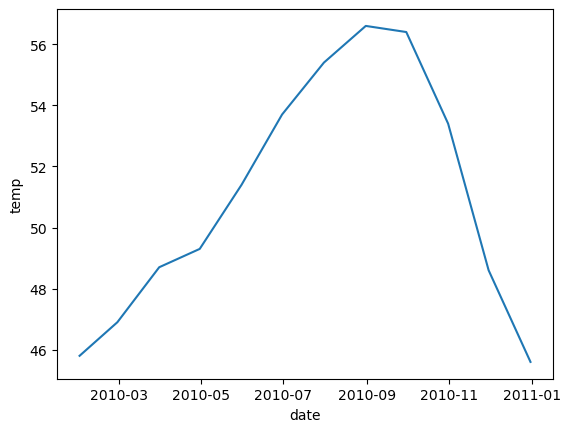

In [195]:
# Lineplot the data
sns.lineplot(x=min_temp.index, y=min_temp.temp);

# 
# Write the code necessary to visualize the maximum temperature over time.


In [44]:
pd.DataFrame(data)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


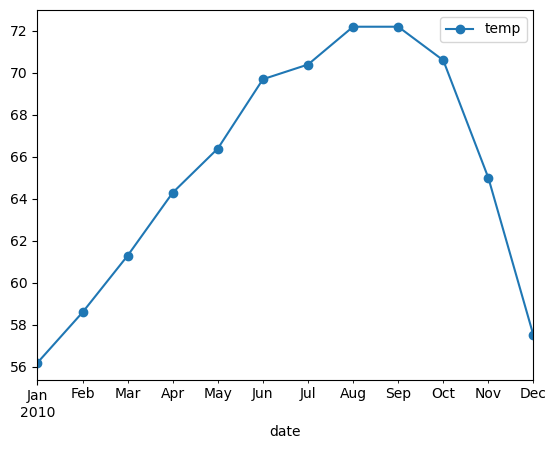

In [56]:
# Resample by month and keep the max values
max_temp = data.resample("M").agg('max')

# .plot() the data
max_temp.plot(marker='o');

#
# Which month is the coldest, on average?

In [62]:
# Resample by mmonth and keep the average value
avg_temp = data.resample("M").agg('mean')

In [69]:
# Find and dsplay the inde x of the lowest average monthly temperature
min_index = avg_temp[avg_temp.temp == avg_temp.temp.min()].index[0]
min_index

Timestamp('2010-01-31 00:00:00', freq='M')

## A: January is the coldest month on average

#
# Which month has the highest average temperature?

In [74]:
# Find and display the index of the highest average monthly temperature
max_index = avg_temp[avg_temp.temp == avg_temp.temp.max()].index[0]

In [73]:
max_index

Timestamp('2010-09-30 00:00:00', freq='M')


## September is the hottest month of the year

#
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [79]:
# Resample by day and assign the minimum and maximum daily temperatures to their own columns
daily_temp = data.resample("D").agg(['min','max'])

In [81]:
daily_temp.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [88]:
# Assign the difference between the maximum and minimum temperatures to a column called 'change'
daily_temp['change'] = daily_temp[('temp', 'max')] - daily_temp[('temp', 'min')]

In [89]:
daily_temp.head()

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7

In [90]:
# Find and return the index of the max change value
max_change_index = daily_temp[daily_temp.change == daily_temp.change.max()].index[0]
max_change_index

Timestamp('2010-08-31 00:00:00', freq='D')


## A: August has the highest temperature variability

## RETURN TO DO BONUS

In [151]:
df = data.seattle_weather()

In [152]:
df = df.set_index('date')

In [153]:
df = pd.DataFrame(df.precipitation)

In [154]:
df.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


# Which year and month combination has the highest amount of precipitation?

In [126]:
# Aggregate by years first only keeping the highest precipitation value
year_df = pd.DataFrame(df.resample('Y').agg('max'))

In [127]:
year_df.head()

,precipitation
date,
2012-12-31,54.1
2013-12-31,43.4
2014-12-31,46.7
2015-12-31,55.9


In [128]:
# Find the index that contains the highest precipitation value
max_precipitation_year = year_df[year_df.precipitation == year_df.precipitation.max()].index[0]

In [129]:
max_precipitation_year

Timestamp('2015-12-31 00:00:00', freq='A-DEC')

In [130]:
# Make a dataframe that only contains the 2015 data
month_df = df[df.index.astype(str).str.contains('2015')]

In [135]:
month_df = pd.DataFrame(month_df)

In [155]:
# Aggregate by month, only keeping the max precipitation values for each month
month_df = month_df.resample("M").precipitation.agg('max')

In [141]:
month_df = pd.DataFrame(month_df)

In [149]:
# Find and return the month with the highest precipitation
year_month = month_df[month_df.precipitation == month_df.precipitation.max()]
year_month

,precipitation
date,
2015-03-31,55.9


## A: March 2015 has the highest precipitation

# Visualize the amount of monthly precipitation over time.

In [156]:
df.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


In [158]:
# Resample by month and give the sum precipitation for each month
month_df = df.resample("M").agg('sum')
month_df.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


<Axes: xlabel='date'>

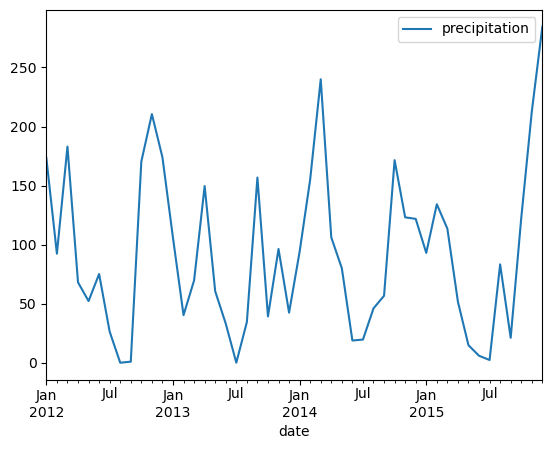

In [196]:
# Plot the data
month_df.plot()

#
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [202]:
# Pull in the data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [203]:
# Set the date column as the index and reduce the dataframe to just the wind column
df = df.set_index('date')
df = pd.DataFrame(df['wind'])
df.head()

,wind
date,
2012-01-01,4.7
2012-01-02,4.5
2012-01-03,2.3
2012-01-04,4.7
2012-01-05,6.1


In [205]:
# Resample by month and keep the mean value of wind
df = df.resample("M").agg('mean')

<Axes: xlabel='date'>

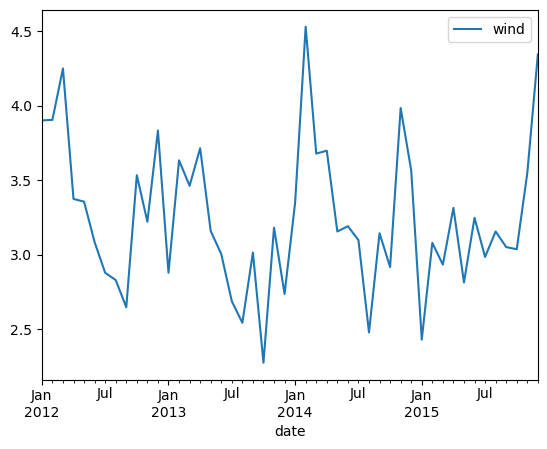

In [206]:
# visualize
df.plot()

#
# Which year-month combination is the windiest?

In [207]:
# Fnd and return the datframe that only contains the max value for wind
max_index = df[df.wind == df.wind.max()]

In [208]:
max_index

,wind
date,
2014-02-28,4.528571


## A: February 2014 was the windiest

# 
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [272]:
# Pull in the data
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [273]:
# Set the index as date
weather = weather.set_index('date')

In [274]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [275]:
# make dummy columns from the strings in weather.weather
weather = pd.concat([weather, pd.get_dummies(weather.weather)], axis=1)

In [277]:
# Reduce the data frame to just the sun information
weather = pd.DataFrame(weather.sun)

In [278]:
# Resample by year and keep the total amount of sunny days
weather = weather.resample("Y").agg('sum')

In [279]:
weather.head()

,sun
date,
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


In [280]:
# Find and display the row that has the highest sount of sunny days
weather = weather[weather.sun == weather.sun.max()]

In [281]:
weather

,sun
date,
2014-12-31,211


## A: 2014 was the sunniest year

#
# In which month does it rain the most?

In [297]:
# Pull in the data
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [298]:
# Set the date to the index
df = weather.set_index('date')

In [299]:
df['month'] = df.index.month_name()

In [300]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
2012-01-02,10.9,10.6,2.8,4.5,rain,January
2012-01-03,0.8,11.7,7.2,2.3,rain,January
2012-01-04,20.3,12.2,5.6,4.7,rain,January
2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [325]:
df.groupby('month').precipitation.sum().sort_values(ascending=False) / 3

month
November     214.166667
December     207.566667
March        202.066667
October      167.800000
January      155.333333
February     140.666667
April        125.133333
September     78.500000
May           69.166667
August        54.566667
June          44.300000
July          16.066667
Name: precipitation, dtype: float64

## A: November was the rainiest month

# Which month has the most number of days with a non-zero amount of precipitation?

In [336]:
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [337]:
df = weather.set_index('date')


In [338]:
df['did_rain'] = df.precipitation >0
df['month'] = df.index.month_name()

In [340]:
df

,precipitation,temp_max,temp_min,wind,weather,did_rain,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,January
2012-01-02,10.9,10.6,2.8,4.5,rain,True,January
2012-01-03,0.8,11.7,7.2,2.3,rain,True,January
2012-01-04,20.3,12.2,5.6,4.7,rain,True,January
2012-01-05,1.3,8.9,2.8,6.1,rain,True,January
...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,True,December
2015-12-28,1.5,5.0,1.7,1.3,fog,True,December
2015-12-29,0.0,7.2,0.6,2.6,fog,False,December


In [344]:
df.resample("M").did_rain.agg('sum').sort_values(ascending=False).head()

date
2012-12-31    27
2015-12-31    25
2012-01-31    22
2012-03-31    22
2015-11-30    20
Name: did_rain, dtype: int64

#
# Convert any negative delays to 0.

In [385]:
# Pull in the data
flights = data.flights_20k()

In [386]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [387]:
flights = flights.set_index('date')

In [388]:
# If a value in the delay column contains a minus sign, replace it with a zero
flights.delay = flights.delay.astype('str').apply(lambda x: '0' if '-' in x else x).astype('int')

In [357]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


# 
# Which hour of the day has the highest average delay?

In [362]:
# Create a column that shows the hour of the day that an observation was made
flights['hour'] = flights.index.hour

In [364]:
flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [369]:
# show the average delay time for each hour of the day, display the top 5
flights.groupby("hour").delay.agg('mean').sort_values(ascending=False).head()

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

#
# Does the day of the week make a difference in the delay amount?

In [374]:
# Create a column that shows the day of the week that each observation was made
flights['day'] = flights.index.day_name()

In [375]:
flights.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [376]:
# show the average delay time for each day of the week, display the top 5
flights.groupby('day').delay.agg('mean').sort_values(ascending=False)

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

## Yes, it appears that there is a wide variance in how delays are on certain days of the week over others

# 
# Does the month make a difference in the delay amount?

In [391]:
# Create a column that shows the name of the month that each observation was made
flights['month'] = flights.index.month_name()

In [393]:
# Check the total delay time per month
flights.groupby('month').delay.agg('sum')

month
February    76987
January     76670
March       68732
Name: delay, dtype: int64

In [378]:
# check the average delay time per day, per month
flights.groupby('month').delay.agg('mean').sort_values(ascending=False)

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64